# Model Training

### scikit - learn

https://scikit-learn.org/stable/

scikitlearn (sklearn) provides simple and efficient tools for predictive data analysis. It is built on NumPy, SciPy, and matplotlib. 

First thing, Import all the libraries

## Linear Regression

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [16]:
# import the final data set
df = pd.read_csv('final.csv')
print(df.shape)
df.head()

(1863, 12)


,price,property_tax,insurance,beds,baths,sqft,lot_size,basement,property_type,popular,recession,property_age
0,295850,234,81,1,1,584,0,0,Condo,0,1,0
1,216500,169,51,1,1,612,0,1,Condo,0,0,41
2,279900,216,74,1,1,615,0,0,Condo,0,1,49
3,379900,265,92,1,1,618,33541,0,Condo,0,0,5
4,340000,88,30,1,1,634,0,0,Condo,0,0,10


## One hot encoding
Converting categorical variables to flag variables

In [17]:
df = pd.get_dummies(df, columns = ['property_type']) #drop_first

In [18]:
df.head()

,price,property_tax,insurance,beds,baths,sqft,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
0,295850,234,81,1,1,584,0,0,0,1,0,False,True
1,216500,169,51,1,1,612,0,1,0,0,41,False,True
2,279900,216,74,1,1,615,0,0,0,1,49,False,True
3,379900,265,92,1,1,618,33541,0,0,0,5,False,True
4,340000,88,30,1,1,634,0,0,0,0,10,False,True


In [19]:
df.describe()

,price,property_tax,insurance,beds,baths,sqft,lot_size,basement,popular,recession,property_age
count,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000
mean,423010.393451,461.369834,138.816425,3.409018,2.564144,2299.173913,12522.044552,0.879227,0.095545,0.263553,24.397209
std,151764.257544,222.484352,70.250523,1.065101,0.928741,1298.029915,35040.992371,0.325951,0.294045,0.440678,21.087996
min,200000.000000,88.000000,30.000000,1.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,300000.000000,319.000000,94.000000,3.000000,2.000000,1342.500000,1540.000000,1.000000,0.000000,0.000000,6.000000
50%,392000.000000,423.000000,124.000000,3.000000,3.000000,1900.000000,5846.000000,1.000000,0.000000,0.000000,21.000000
75%,525000.000000,564.000000,168.000000,4.000000,3.000000,2951.000000,11325.000000,1.000000,0.000000,1.000000,38.000000
max,800000.000000,4508.000000,1374.000000,5.000000,6.000000,7842.000000,436471.000000,1.000000,1.000000,1.000000,114.000000


**Before you begin modeling, you should split the data in train and test subsets.**
* Training sets are used to fit and tune your models.
* Test sets are put aside as "unseen" data to evaluate your models.
* The `train_test_split()` function splits data into randomized subsets.

In [20]:
# seperate the target variable
y = df.price

# seperate the features
x = df.drop('price', axis=1)

df.iloc[:,1:3]

,property_tax,insurance
0,234,81
1,169,51
2,216,74
3,265,92
4,88,30
...,...,...
1858,881,249
1859,1553,473
1860,942,287
1861,803,245


In [21]:
df.corr().sort_values('price')

,price,property_tax,insurance,beds,baths,sqft,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
property_type_Condo,-0.322641,-0.449372,-0.410135,-0.658729,-0.339109,-0.525699,-0.250534,-0.253299,0.303769,0.053224,-0.224685,-1.000000,1.000000
popular,-0.148108,-0.208959,-0.173812,-0.430083,-0.197480,-0.270799,-0.092659,-0.198936,1.000000,0.083255,-0.083813,-0.303769,0.303769
recession,-0.022207,-0.121395,-0.120809,-0.070744,-0.057730,-0.078903,0.006077,-0.047486,0.083255,1.000000,0.097146,-0.053224,0.053224
property_age,-0.005428,0.012119,0.075054,-0.015989,-0.213489,-0.284702,-0.042227,-0.018488,-0.083813,0.097146,1.000000,0.224685,-0.224685
basement,0.109144,0.182701,0.135135,0.413082,0.344052,0.270175,0.061934,1.000000,-0.198936,-0.047486,-0.018488,0.253299,-0.253299
lot_size,0.185244,0.218076,0.188731,0.228757,0.186494,0.325832,1.000000,0.061934,-0.092659,0.006077,-0.042227,0.250534,-0.250534
property_type_Bunglow,0.322641,0.449372,0.410135,0.658729,0.339109,0.525699,0.250534,0.253299,-0.303769,-0.053224,0.224685,1.000000,-1.000000
beds,0.387682,0.544898,0.479399,1.000000,0.640168,0.688634,0.228757,0.413082,-0.430083,-0.070744,-0.015989,0.658729,-0.658729
baths,0.398615,0.507861,0.454178,0.640168,1.000000,0.669070,0.186494,0.344052,-0.197480,-0.057730,-0.213489,0.339109,-0.339109
sqft,0.486858,0.640393,0.569497,0.688634,0.669070,1.000000,0.325832,0.270175,-0.270799,-0.078903,-0.284702,0.525699,-0.525699


In [42]:
# import module for train-test split
from sklearn.model_selection import train_test_split

'''
x = df[['property_tax',
        'insurance',
        'sqft',
        'baths',
        'beds']]
'''

x = df.drop(columns=['price','property_type_Condo', 'popular', 'recession', 'property_age', 'basement', 'lot_size'])

# Split the dataset
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.20, random_state=1234)

In [43]:
# check records in each split
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1490, 6), (373, 6), (1490,), (373,))

In [44]:
# import the model
from sklearn.linear_model import LinearRegression

# train the model
#del model
lrmodel = LinearRegression().fit(xtrain,ytrain)

In [45]:
# make prediction on train set
ytrain_pred = lrmodel.predict(xtrain)

In [46]:
# import mean absolute error metric
from sklearn.metrics import mean_absolute_error

# evaluate the model
train_mae = mean_absolute_error(ytrain_pred, ytrain)
train_mae

97175.29650197207

In [47]:
# make predictions using the x_test values
ytest_pred = lrmodel.predict(xtest)

In [48]:
# evaluate the model
test_mae = mean_absolute_error(ytest_pred, ytest)
test_mae

86906.15091572494

## Decision Tree Model

In [29]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor().fit(xtrain,ytrain)

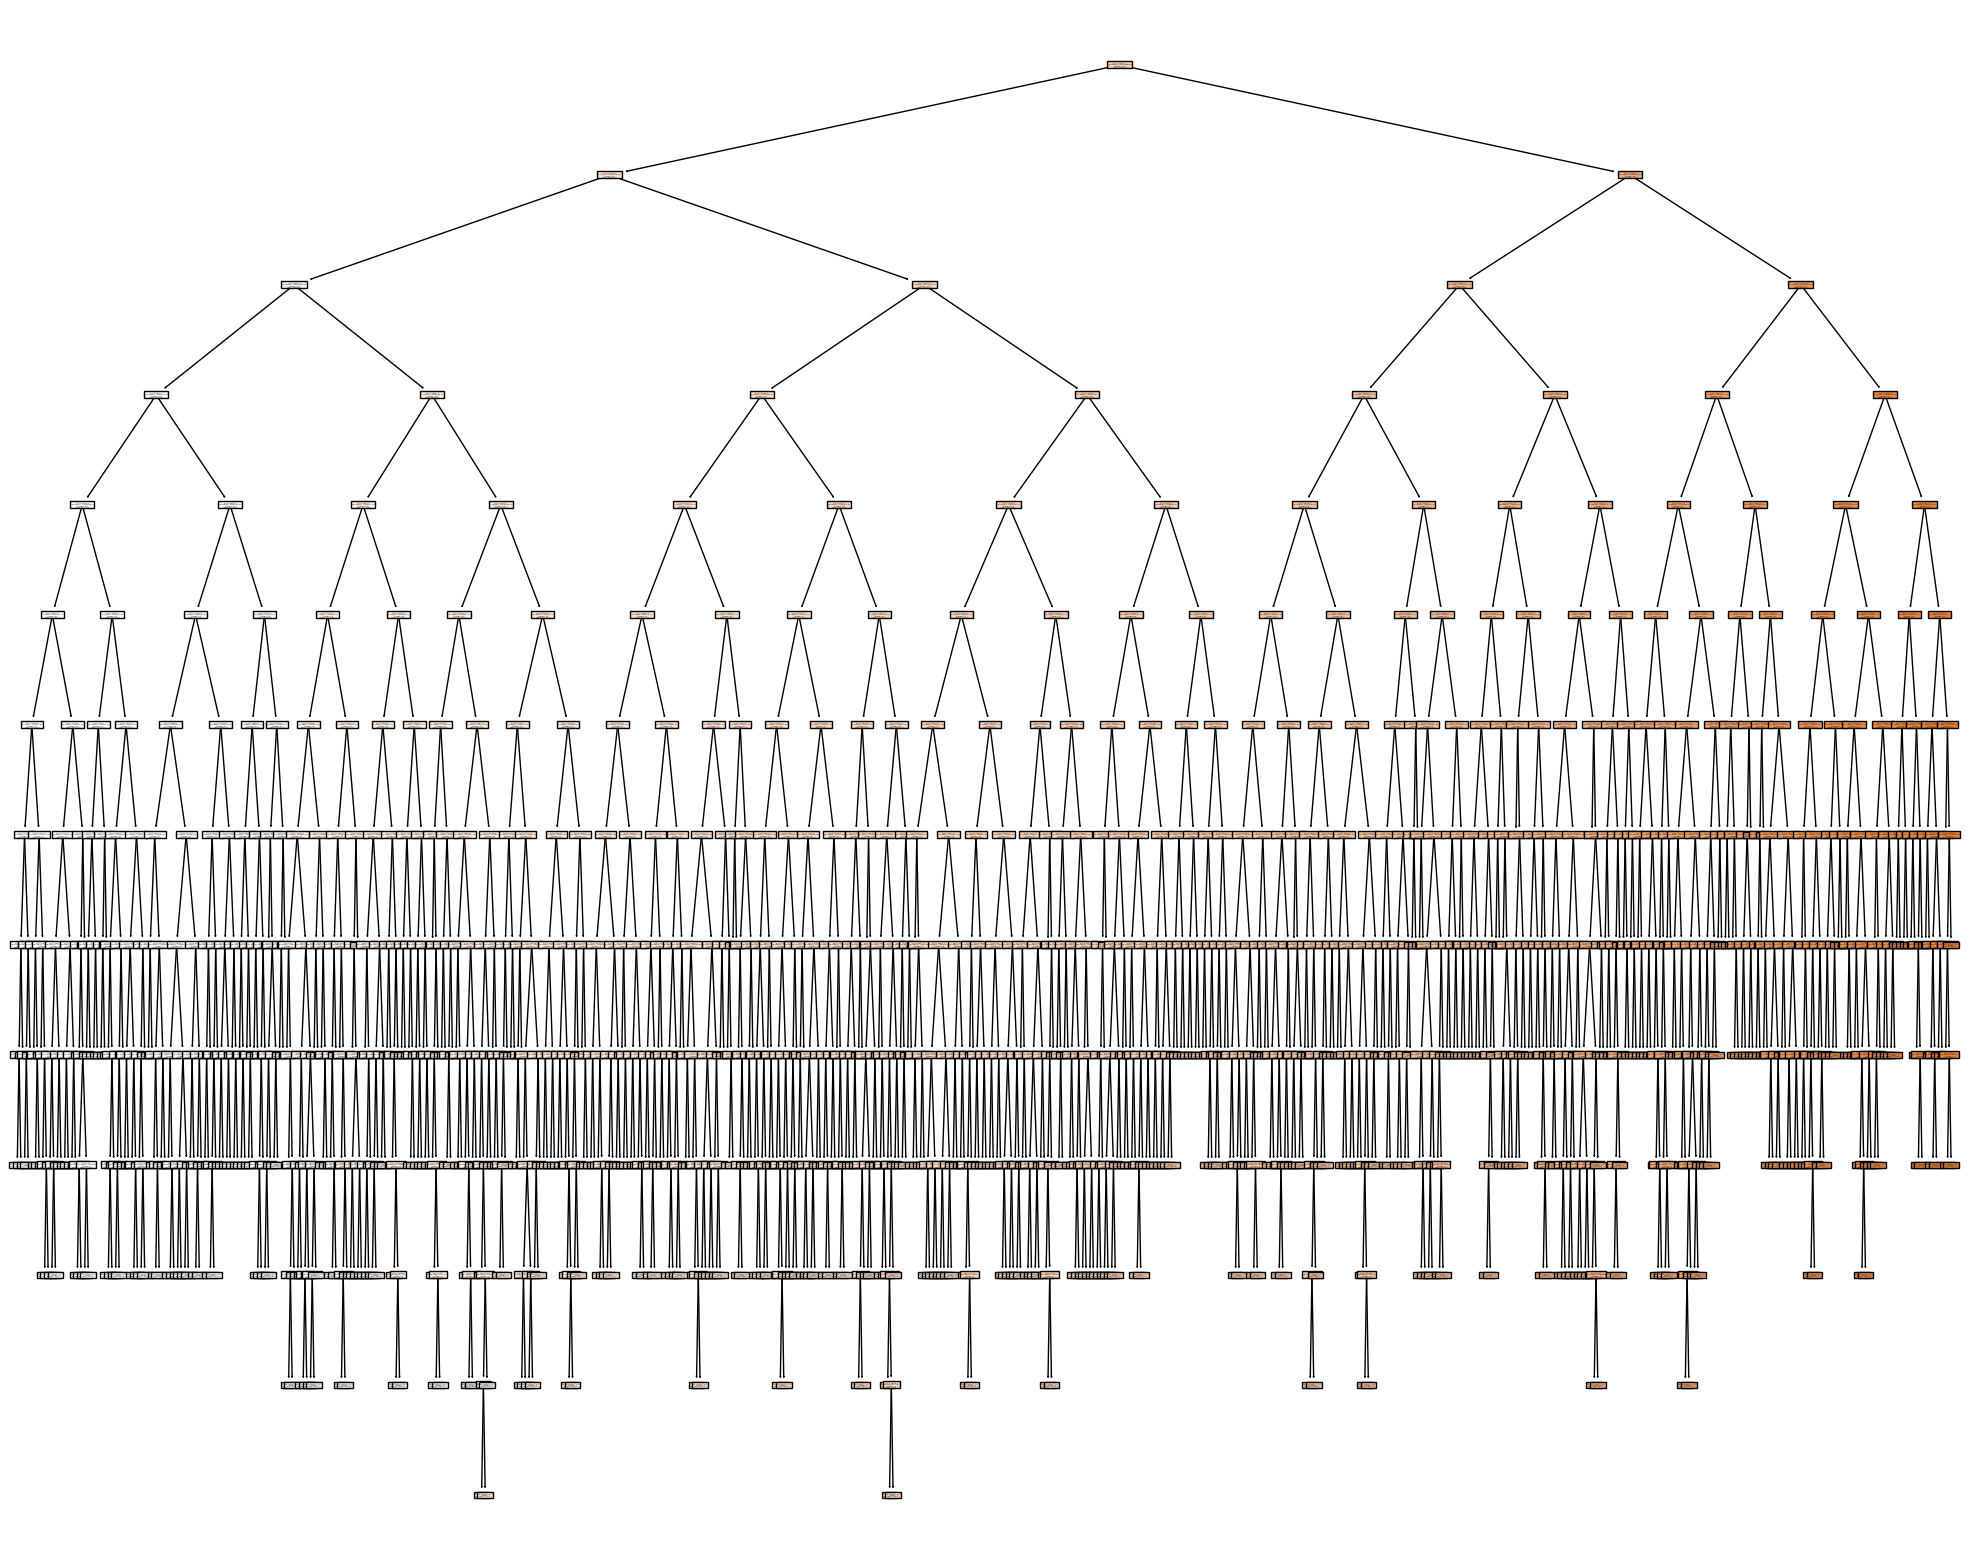

In [30]:
# plotting tree
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt, filled=True)
plt.show()

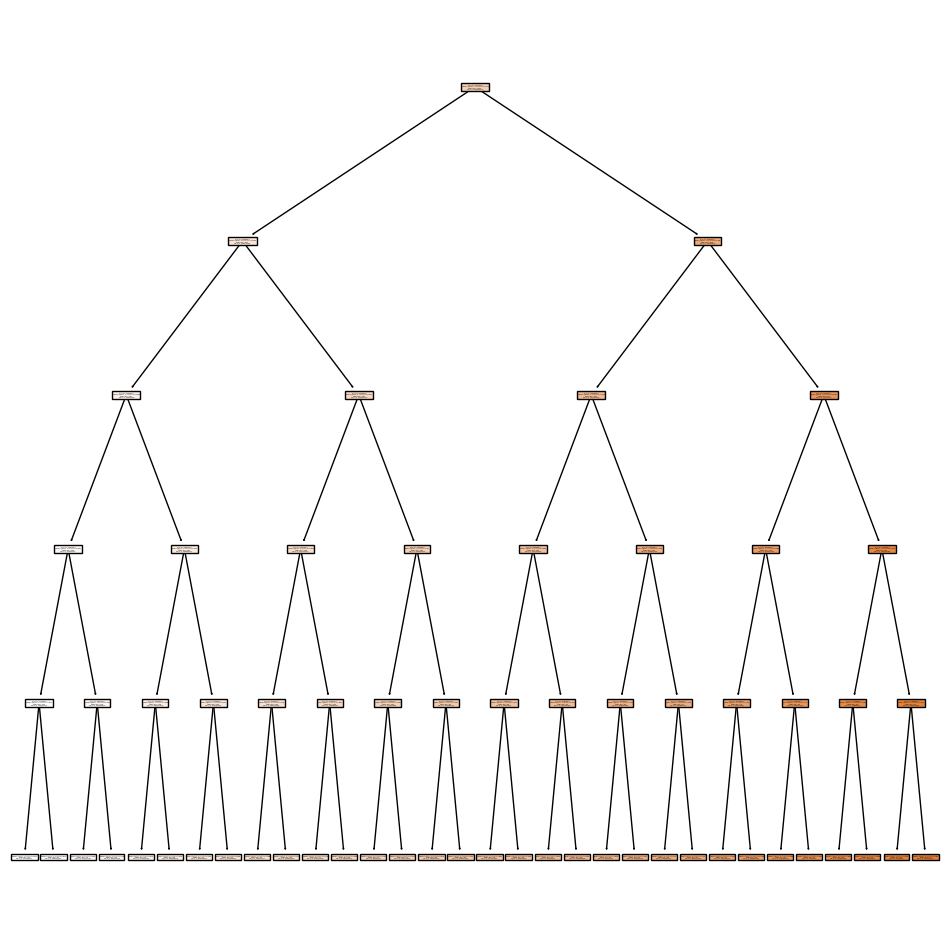

In [31]:
# Prune the tree using hyperparameters
dt = DecisionTreeRegressor(max_depth=5, min_samples_split=30).fit(xtrain,ytrain)
from sklearn import tree

plt.figure(figsize=(12,12))
tree.plot_tree(dt, filled=True);


In [32]:
ytrain_pred = dt.predict(xtrain)
dt_mae = mean_absolute_error(ytrain_pred, ytrain)
print('Train error is',dt_mae)

Train error is 4452.404371455868


In [33]:
# make predictions using the x_test values
ytest_pred = dt.predict(xtest)

# evaluate the model
test_mae = mean_absolute_error(ytest_pred, ytest)
test_mae

4540.93677196313

## Random Forest Model

In [34]:
# import Random Forest model from scikit learn
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200,criterion='absolute_error').fit(xtrain,ytrain)
ytrain_pred = rf.predict(xtrain)
rftrain_mae = mean_absolute_error(ytrain_pred, ytrain)
print('Train error RF model is',rftrain_mae)

Train error RF model is 85.00310402684447


In [35]:
# make predictions on the x_test values
ytest_pred = rf.predict(xtest)

# evaluate the model
rftest_mae = mean_absolute_error(ytest_pred, ytest)
rftest_mae

193.0922922252016

#### From the observations above, answers the following questions:

Q1. Which model gave the lowest error? - 1 point

Ans:

The random forest model gave the lowest error.   

Q2. Why was linear regression not a suitable choice for this data? - 1 point

Ans:

The data had categorical variables. Although they can be converted to numerical, it isn't entirely accurate to do so. 

Q3. Which are the top 5 important features in this dataset? - 1 point

Ans:
'property_tax',
'insurance',
'sqft',
'baths',
'beds'

all had the highest correlations with price.

## Saving the Model

## Pickle: 

* The pickle module implements a fundamental, but powerful algorithm for serializing and de-serializing a Python object structure. 

* The saving of data is called Serialization, while restoring the data is called Deserialization.

**Pickle** model provides the following functions:
* **`pickle.dump`** to serialize an object hierarchy, you simply use `dump()`. 
* **`pickle.load`** to deserialize a data stream, you call the `loads()` function.

In [36]:
# import pickle to save model
import pickle
 
# Save the trained model on the drive 
pickle.dump(lrmodel, open('RE_Model','wb'))

In [37]:
# Load the pickled model
RE_Model = pickle.load(open('RE_Model','rb'))

In [38]:
np.array(xtrain.loc[22])

array([240000, 139, 42, 1, 1, 703, False], dtype=object)

In [39]:
ytrain[22]

240000

In [40]:
df

,price,property_tax,insurance,beds,baths,sqft,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
0,295850,234,81,1,1,584,0,0,0,1,0,False,True
1,216500,169,51,1,1,612,0,1,0,0,41,False,True
2,279900,216,74,1,1,615,0,0,0,1,49,False,True
3,379900,265,92,1,1,618,33541,0,0,0,5,False,True
4,340000,88,30,1,1,634,0,0,0,0,10,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,760000,881,249,5,5,7842,436035,1,0,0,5,True,False
1859,690000,1553,473,5,6,6501,23086,1,0,0,59,True,False
1860,600000,942,287,5,6,7064,217800,1,0,0,4,True,False
1861,759900,803,245,5,6,7500,8886,1,0,0,3,True,False


In [41]:
# Use the loaded pickled model to make predictions
RE_Model.predict([[139,  42,   1,   1, 703,   0,   1,  0,   0,   6,   1,  0]])

/Users/mattd/miniconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 12 features, but LinearRegression is expecting 7 features as input.